In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('NewExp_31J - qoe.csv')
#print(df.shape[0])

In [4]:
df.head()

,intExpID,Type,Case,Protocol,total_users,user_no,intSeg,intArr,intDel,intSta,...,algorithm_used,seg_Dur,width,height,resolutions,Clae,Duanmu,Yin,Yu,P1203
0,1,4g,1,tcp,1,1,1,112,110,0,...,elastic,2000,320,180,320x180,0.000,51.077,-5760.485,0.240,1.871
1,1,4g,1,tcp,1,1,2,1268,309,0,...,elastic,2000,320,180,320x180,0.480,46.477,-11520.970,0.240,1.871
2,1,4g,1,tcp,1,1,3,2369,317,0,...,elastic,2000,320,180,320x180,0.480,46.477,718.545,0.240,1.871
3,1,4g,1,tcp,1,1,4,3459,317,0,...,elastic,2000,384,216,384x216,0.419,46.817,958.060,0.274,1.884
4,1,4g,1,tcp,1,1,5,4553,318,0,...,elastic,2000,384,216,384x216,0.436,46.963,1336.637,0.295,1.880


In [5]:
four_g = df[(df['Type']=='4g')]
five_g = df[(df['Type']=='5g')]

In [6]:
bba_4g = four_g[(four_g['algorithm_used']=='bba')]
elastic_4g = four_g[(four_g['algorithm_used']=='elastic')]
conv_4g = four_g[(four_g['algorithm_used']=='conventional')]

In [7]:
bba_5g = five_g[(five_g['algorithm_used']=='bba')]
elastic_5g = five_g[(five_g['algorithm_used']=='elastic')]
conv_5g = five_g[(five_g['algorithm_used']=='conventional')]

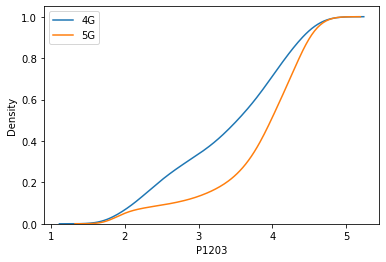

In [111]:
sns.kdeplot(four_g.P1203, cumulative=True, x="P1203", label='4G')
sns.kdeplot(five_g.P1203, cumulative=True, x="P1203", label='5G')
#plt.xlabel("Throuhput Mbps")
plt.legend()
plt.savefig('CMP/P1203.png',  bbox_inches='tight')

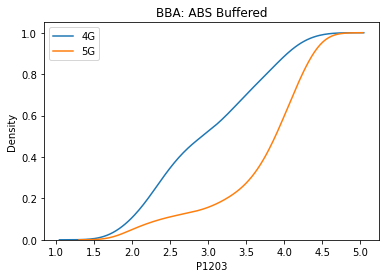

In [112]:
sns.kdeplot(bba_4g.P1203, cumulative=True, x="P1203", label='4G')
sns.kdeplot(bba_5g.P1203, cumulative=True, x="P1203", label='5G')
plt.title("BBA: ABS Buffered")
plt.legend()
plt.savefig('CMP/bba_P1203.png',  bbox_inches='tight')

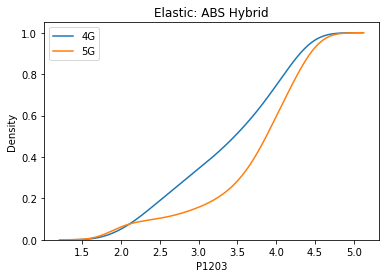

In [113]:
sns.kdeplot(elastic_4g.P1203, cumulative=True, x="P1203", label='4G')
sns.kdeplot(elastic_5g.P1203, cumulative=True, x="P1203", label='5G')
plt.title("Elastic: ABS Hybrid")
plt.legend()
plt.savefig('CMP/elastic_P1203.png',  bbox_inches='tight')

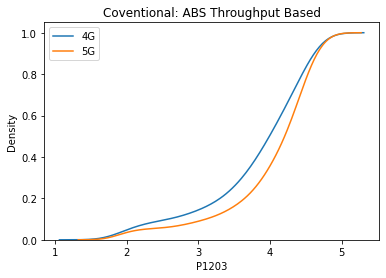

In [114]:
sns.kdeplot(conv_4g.P1203, cumulative=True, x="P1203", label='4G')
sns.kdeplot(conv_5g.P1203, cumulative=True, x="P1203", label='5G')
plt.title("Coventional: ABS Throughput Based")
plt.legend()
plt.savefig('CMP/conv_P1203.png',  bbox_inches='tight')

# Quality Shifts

Quality shifts refers to change in resolutions during the session

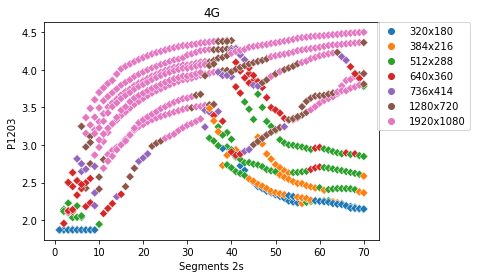

In [115]:
sns.scatterplot(data=elastic_4g, x="intSeg", y="P1203", hue="resolutions", 
                hue_order=['320x180','384x216','512x288','640x360','736x414','1280x720','1920x1080'],marker='D')
plt.xlabel("Segments 2s")
plt.title("4G")
plt.legend(bbox_to_anchor=(0.979, 1.025))
plt.savefig('CMP/shifts_4g.png',  bbox_inches='tight')

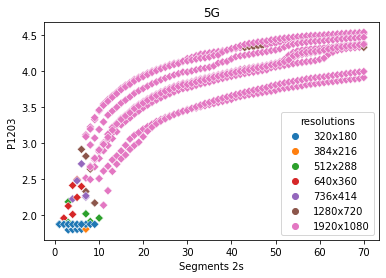

In [116]:
sns.scatterplot(data=elastic_5g, x="intSeg", y="P1203", hue="resolutions",
               hue_order=['320x180','384x216','512x288','640x360','736x414','1280x720','1920x1080'],
                marker='D')
plt.title("5G")
plt.xlabel("Segments 2s")
plt.savefig('CMP/shifts_5g.png',  bbox_inches='tight')

In [117]:
# Voilon Plots

In [118]:
df['Type'] = df['Type'].str.upper()
df['algorithm_used'] = df['algorithm_used'].str.upper()

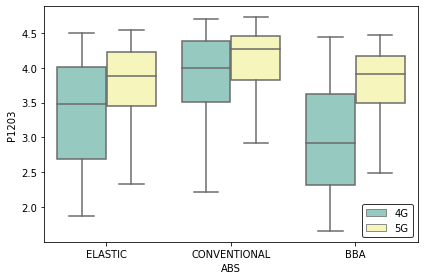

In [150]:
sns.boxplot(x='algorithm_used',y='P1203',data=df, hue='Type', palette="Set3",showfliers = False)
plt.xlabel('ABS')
#l = plt.legend(bbox_to_anchor=(1.169, 1.023))
l = plt.legend(loc='lower right')
l.get_frame().set_edgecolor('black')
plt.savefig('CMP/box.png')
plt.tight_layout()

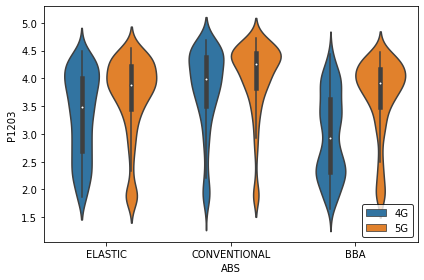

In [149]:
sns.violinplot(x='algorithm_used',y='P1203',data=df, hue='Type')
plt.xlabel('ABS')
l = plt.legend(loc='lower right')
l.get_frame().set_edgecolor('black')
plt.savefig('CMP/Violin.png')
plt.tight_layout()

# QoS Logs Comparison

In [121]:
qos = pd.read_csv('NewExp_31J - qos.csv')
#print(qos.shape[0])

In [122]:
qos.head()

,Exp,Video,Window,ExpID,Case,Algo,timeslot sec,timeslot mil,IAT,IPG Avg,...,40p TP,50p TP,60p TP,70p TP,80p TP,90p TP,Single EMA,Double EMA,CUSUM,P1203
0,1,Sintel,1,1,4g,elastic,0,0,0.008800,0.004400,...,1.283397e+05,1.349701e+05,1.416006e+05,1.482310e+05,1.548615e+05,1.614920e+05,0.005741,0.021596,0.011655,1.871
1,1,Sintel,1,1,4g,elastic,1,1000,0.243306,0.034758,...,1.247499e+05,1.520744e+05,5.662215e+05,8.514394e+05,8.787987e+05,9.478298e+05,0.013778,0.783804,0.579516,1.871
2,1,Sintel,1,1,4g,elastic,2,2000,0.483384,0.023018,...,9.375385e+04,9.452205e+04,1.210198e+05,1.243255e+05,1.258865e+05,1.440388e+05,6.000940,10.008248,7.921368,1.871
3,1,Sintel,1,1,4g,elastic,3,3000,0.265073,0.007796,...,1.394341e+06,1.714518e+06,1.899404e+06,2.139716e+06,2.278086e+06,2.432442e+06,1.832651,11.332073,5.758516,1.884
4,1,Sintel,1,1,4g,elastic,4,4000,0.271209,0.005896,...,2.352123e+06,2.519905e+06,2.692111e+06,2.949995e+06,3.173717e+06,3.400863e+06,1.042774,17.535281,7.245427,1.880


In [123]:
qos.columns

Index(['Exp', 'Video', 'Window', 'ExpID', 'Case', 'Algo', 'timeslot sec',
       'timeslot mil', 'IAT', 'IPG Avg', 'IPG Avg GT100', 'IAT GT100',
       'Throughput', 'Total Packets', 'Total Packet GT100', '10p Length',
       '20p Length', '30p Length', '40p Length', '50p Length', '60p Length',
       '70p Length', '80p Length', '90p Length', '10p TP', '20p TP', '30p TP',
       '40p TP', '50p TP', '60p TP', '70p TP', '80p TP', '90p TP',
       'Single EMA', 'Double EMA', 'CUSUM', 'P1203'],
      dtype='object')

In [124]:
four_gq = qos[(qos['Case']=='4g')]
five_gq = qos[(qos['Case']=='5g')]

In [125]:
five_gq[five_gq['CUSUM']>350].index

Int64Index([], dtype='int64')

In [126]:
four_gq[four_gq['CUSUM']>350].index

Int64Index([2076], dtype='int64')

In [127]:
five_gq[five_gq['Single EMA']>30].index


Int64Index([6400], dtype='int64')

In [128]:
four_gq[four_gq['Single EMA']>30].index

Int64Index([584, 1360, 6262], dtype='int64')

In [129]:
four_gq.drop([584, 1360, 6262,2076], axis=0, inplace=True)
five_gq.drop([6400], axis=0, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


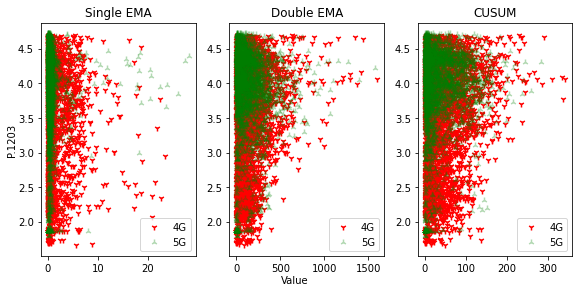

In [130]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(8,4))
#plt.subplot(1,3,1)
axes[0].scatter(four_gq['Single EMA'], four_gq["P1203"], color='r',marker='1', label='4G')
axes[0].scatter(five_gq['Single EMA'], five_gq["P1203"], color='g', marker='2',alpha=0.3, label='5G')
axes[0].legend(loc='lower right')
axes[0].set_title('Single EMA')
axes[1].scatter(four_gq['Double EMA'], four_gq["P1203"], color='r',marker='1', label='4G')
axes[1].scatter(five_gq['Double EMA'], five_gq["P1203"], color='g', marker='2',alpha=0.3, label='5G')
axes[1].set_title('Double EMA')
#axes[2].set_xlabel('Double EMA Values')
axes[1].legend()
axes[2].scatter(four_gq['CUSUM'], four_gq["P1203"], color='r',marker='1', label='4G')
axes[2].scatter(five_gq['CUSUM'], five_gq["P1203"], color='g', marker='2',alpha=0.3, label='5G')
axes[2].set_title('CUSUM')
#axes[2].set_xlabel('CUSUM Values')
axes[2].legend()
plt.tight_layout()
fig.text(0.5, 0, 'Value', ha='center')
fig.text(0, 0.5, 'P.1203', va='center', rotation='vertical')

plt.savefig('CMP/ShiftsQoS.png')

In [131]:
five_g[(five_g['intSta']>500)].index

Int64Index([], dtype='int64')

In [133]:
#five_g.drop([1402], axis=0, inplace=True)

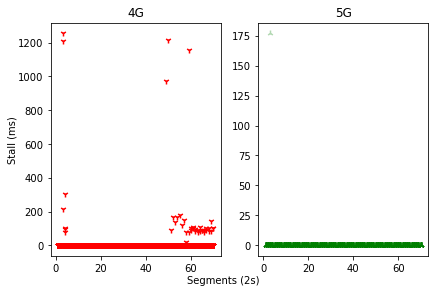

In [134]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,4))
#plt.subplot(1,3,1)
axes[0].scatter(four_g['intSeg'], four_g["intSta"], color='r',marker='1', label='4G')
axes[0].set_title('4G')
axes[1].scatter(five_g['intSeg'], five_g["intSta"], color='g', marker='2',alpha=0.3, label='5G')
axes[1].set_title('5G')
fig.text(0.5, 0, 'Segments (2s)', ha='center')
fig.text(0, 0.5, 'Stall (ms)', va='center', rotation='vertical')
plt.tight_layout()
plt.savefig('CMP/Stall.png')

In [ ]:
# Great Job